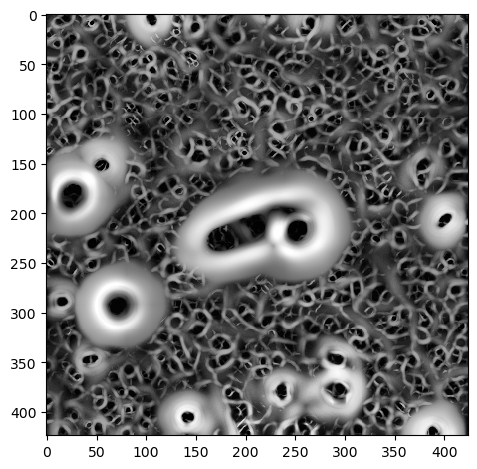

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure, exposure

# Load the image
image = io.imread('/workspaces/ClusteringGalaxies/images_training_subfolder31/994357.jpg')

gray_image = color.rgb2gray(image)

# Apply preprocessing if needed 
smoothed_image = filters.sato(gray_image)
contrasted_image = exposure.equalize_adapthist(smoothed_image, clip_limit=0.03)

io.imshow(contrasted_image)

In [107]:
# Apply thresholding
threshold_value = filters.threshold_otsu(smoothed_image)
binary_image = smoothed_image > threshold_value

# Label connected components
labeled_image = measure.label(binary_image)


In [108]:
# Filter objects based on area (adjust threshold as needed)
min_area = 100
filtered_objects = [region for region in measure.regionprops(labeled_image) if region.area > min_area]



Center: (182.6802557953637, 28.941646682653875), Area: 2502.0
Center: (215.5549663179017, 229.33366776551526), Area: 6977.0
Center: (293.2478979414323, 72.34386778776457), Area: 3449.0


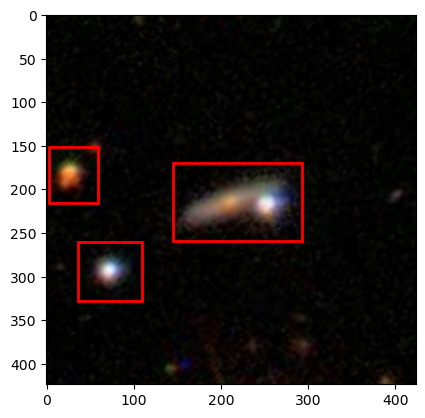

In [109]:
# Draw bounding boxes on the original image
result_image = image.copy()

for region in filtered_objects:
    minr, minc, maxr, maxc = region.bbox
    print(f"Center: {region.centroid}, Area: {region.area}")
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
    plt.gca().add_patch(rect)
    

# Display the result
plt.imshow(result_image)
plt.show()
